In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('TiktokTrendingBR.csv')

In [4]:
df

,id,user_name,user_id,video_id,video_desc,video_time,video_length,video_link,n_likes,n_shares,n_comments,n_plays,music_name,music_url;;
0,0,meekotheiggy,6.735780e+18,6928073780141018373,Sleep = life #italiangreyhound #foryoupage #fy...,1.613068e+09,10.0,https://www.tiktok.com/@meekotheiggy/video/692...,1000000,151600,76300,12900000.0,оригинальный звук,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...
1,1,sergioconstrutor,6.860046e+18,6931147355534281990,NaN,1.613784e+09,36.0,https://www.tiktok.com/@sergioconstrutor/video...,572800,184100,7311,31300000.0,som original,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...
2,2,callenschaub,6.658309e+18,6957448266824846598,FIRST NFT “Antithesis” on foundation!,1.619907e+09,24.0,https://www.tiktok.com/@callenschaub/video/695...,2400000,7771,27900,31000000.0,original sound,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...
3,3,muyanxu01,6.947266e+18,6955495851917692166,#cat #love #kitten #foryou,1.619453e+09,8.0,https://www.tiktok.com/@muyanxu01/video/695549...,119500,32400,2293,2800000.0,原聲,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...
4,4,lucasranngel,1.954456e+07,6956216246446673157,kkkkkkkk eu sou um jumento msm,1.619620e+09,28.0,https://www.tiktok.com/@lucasranngel/video/695...,870100,2326,7576,7600000.0,som original,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,cauabipolar,6.818413e+18,6932902299882786054,Resposta a @narutoxboruto004,1.614192e+09,20.0,https://www.tiktok.com/@cauabipolar/video/6932...,38100,12,230,251600.0,dc n.gabriella15,https://video-va.tiktokv.com/storage/v1/tos-us...
9996,9996,dhef_almeidaa,6.609706e+18,6957075326207806725,#dueto com @deshygirl25 vai amar o tutorial ha...,1.619820e+09,9.0,https://www.tiktok.com/@dhef_almeidaa/video/69...,15800,3807,65,1100000.0,Runaway,https://sf16-ies-music-sg.tiktokcdn.com/obj/ti...
9997,9997,status.reflexoes,6.935370e+18,6954279242066644229,#memes #sextou #funny #proerd #status #bomd...,1.619169e+09,14.0,https://www.tiktok.com/@status.reflexoes/video...,15000,5653,29,312100.0,som original,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...
9998,9998,marcelocalopsita,6.794832e+18,6930361196868537606,quem aí também é assim? 😂 #fy #viral,1.613600e+09,11.0,https://www.tiktok.com/@marcelocalopsita/video...,34000,324,161,371200.0,original sound,https://sf16-ies-music-sg.tiktokcdn.com/obj/ti...


In [6]:
df = df.drop(columns=['id','user_id', 'video_id', 'video_link', 'music_url;;','video_desc','video_time'])
df = df.drop_duplicates()
df = df.dropna()
df = df.set_index('user_name')

In [8]:
df['n_comments'] = pd.to_numeric(df['n_comments'], errors='coerce').astype('Int64')
df['n_plays'] = pd.to_numeric(df['n_plays'], errors='coerce').astype('Int64')
df['n_shares'] = pd.to_numeric(df['n_shares'], errors='coerce').astype('Int64')
df['n_likes'] = pd.to_numeric(df['n_likes'], errors='coerce').astype('Int64')

In [9]:
df

,video_length,n_likes,n_shares,n_comments,n_plays,music_name
user_name,,,,,,
meekotheiggy,10.0,1000000,151600,76300,12900000,оригинальный звук
sergioconstrutor,36.0,572800,184100,7311,31300000,som original
callenschaub,24.0,2400000,7771,27900,31000000,original sound
muyanxu01,8.0,119500,32400,2293,2800000,原聲
lucasranngel,28.0,870100,2326,7576,7600000,som original
...,...,...,...,...,...,...
cauabipolar,20.0,38100,12,230,251600,dc n.gabriella15
dhef_almeidaa,9.0,15800,3807,65,1100000,Runaway
status.reflexoes,14.0,15000,5653,29,312100,som original


Mediana de likes: 397794.63


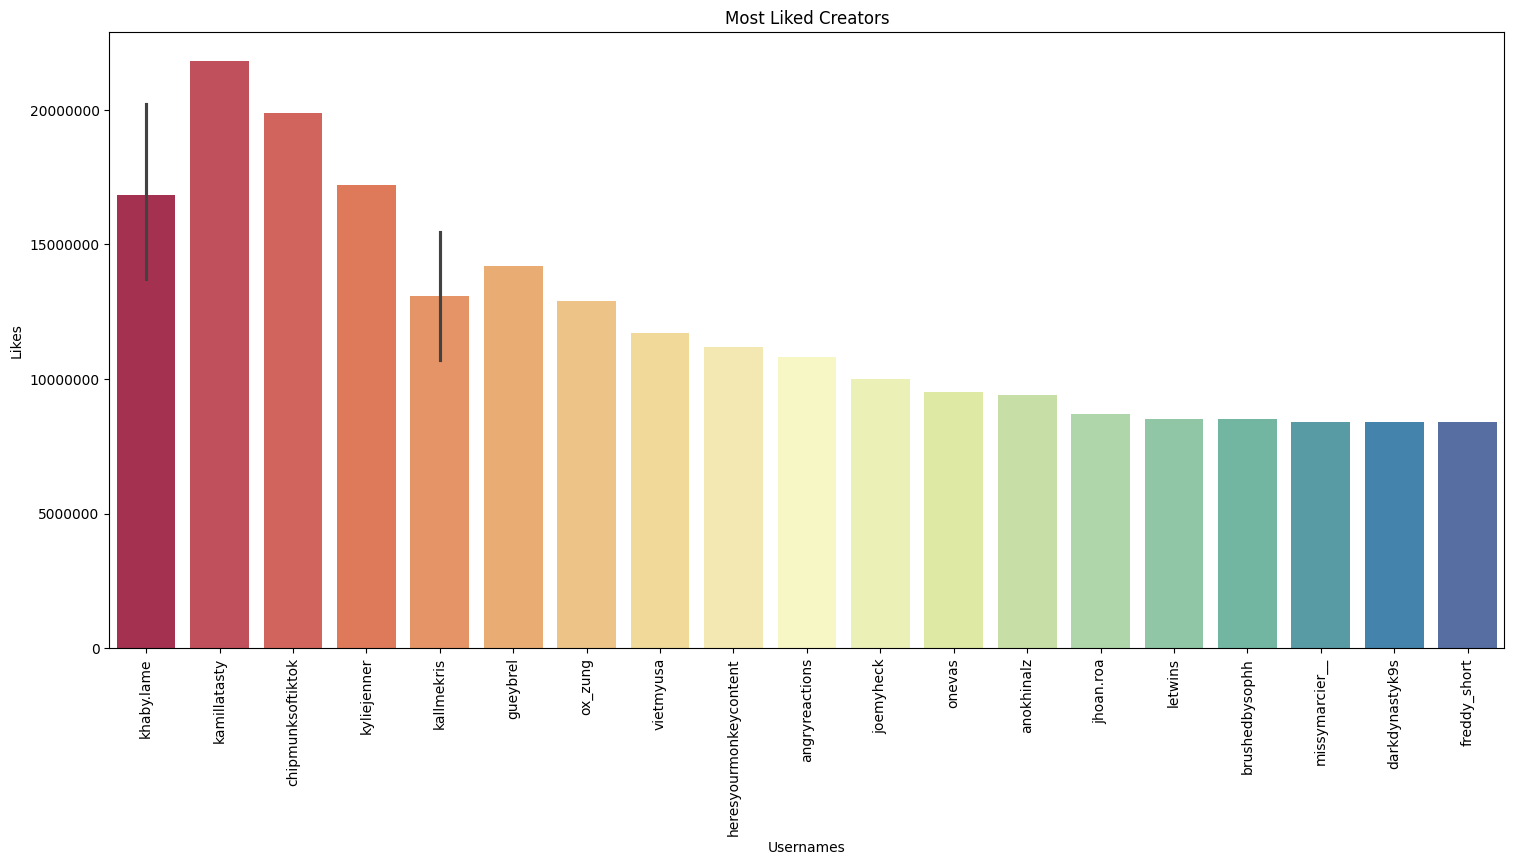

In [11]:
df = df.sort_values(by='n_likes', ascending=False)

plt.figure(figsize=(18,8))
plt.ticklabel_format(style = 'plain')

graph = sns.barplot( x = df.index[:40], y = df.n_likes[:40], hue = df.index[:40],  palette = 'Spectral', errorbar = ('ci') )
plt.xticks(rotation=90)

plt.title('Most Liked Creators')
plt.ylabel('Likes')
plt.xlabel('Usernames')
plt.savefig('./graphs/mostliked.png', dpi=200, bbox_inches='tight')

print('Mediana de likes:', np.round(df['n_likes'].mean(), decimals=2))

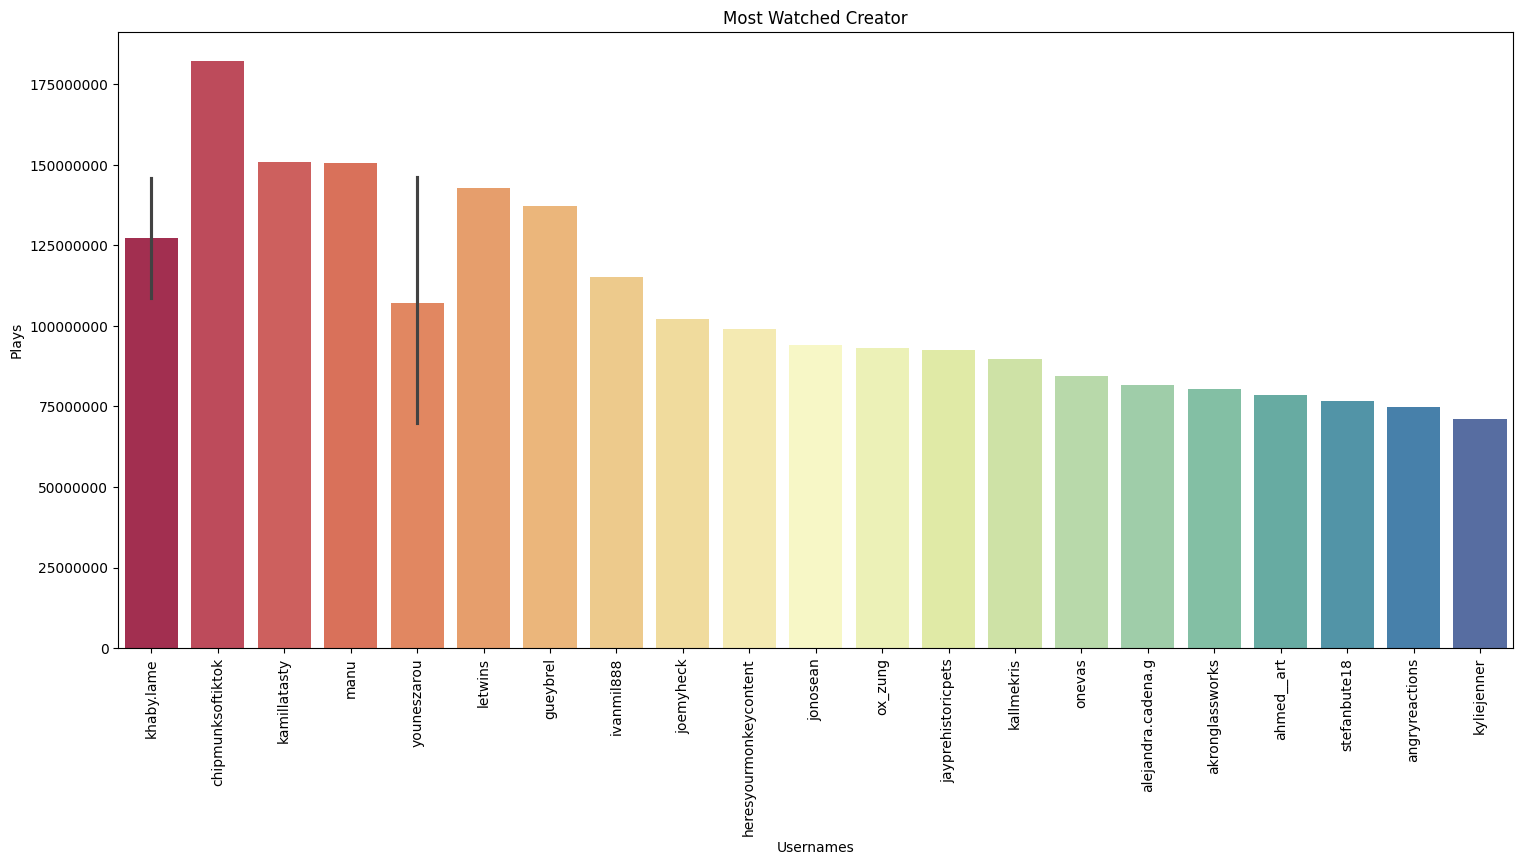

In [13]:
df = df.sort_values(by='n_plays', ascending=False)

plt.figure(figsize=(18,8))
plt.ticklabel_format(style = 'plain')
graph = sns.barplot( x = df.index[:40], y = df.n_plays[:40], hue = df.index[:40],  palette = 'Spectral')
plt.xticks(rotation=90)

plt.title('Most Watched Creator')
plt.ylabel('Plays')
plt.xlabel('Usernames')

plt.savefig('./graphs/mostwatched.png', dpi=200, bbox_inches='tight')


Text(0.5, 0, '')

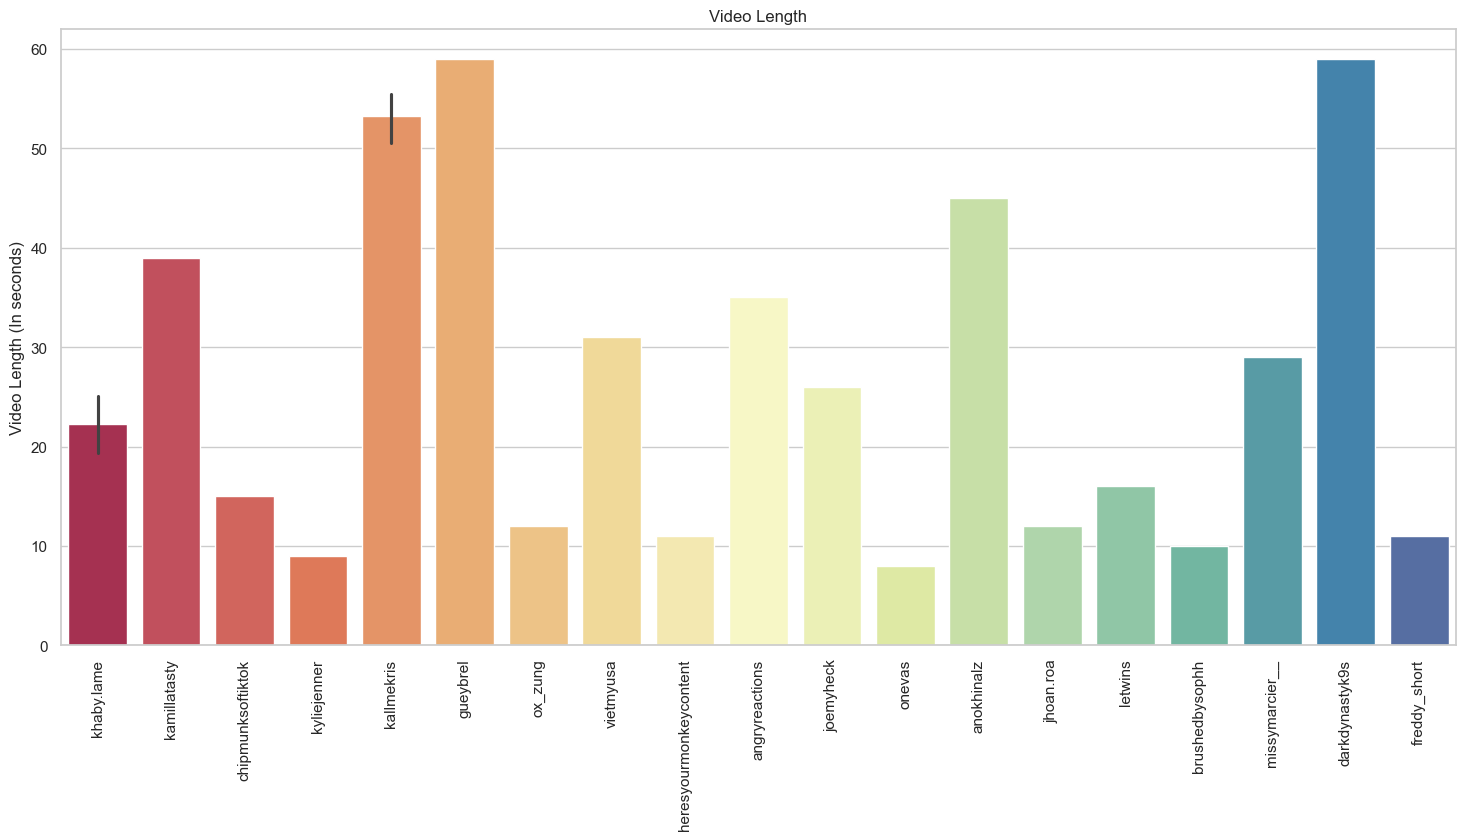

In [40]:
df = df.sort_values(by='n_likes', ascending=False)

plt.figure(figsize=(18,8))
plt.ticklabel_format(style = 'plain')
graph = sns.barplot(x = df.index[df.n_plays >= 25000000][:40], y = df.video_length[df.n_plays >= 25000000][:40], hue = df.index[df.n_plays >= 25000000][:40], legend = False, palette = 'Spectral', errorbar = ('ci'))

plt.xticks(rotation=90)

plt.title('Video Length')
plt.ylabel('Video Length (In seconds)')
plt.xlabel('')


In [17]:
df_users = df.groupby(df.index).sum()

In [18]:
df_users['share_rate'] = df_users['n_shares'] / df_users['n_plays'] * 100
df_users['engagement'] = df_users['n_likes'] / df_users['n_plays'] * 100

Mean of share rate: 0.96 %


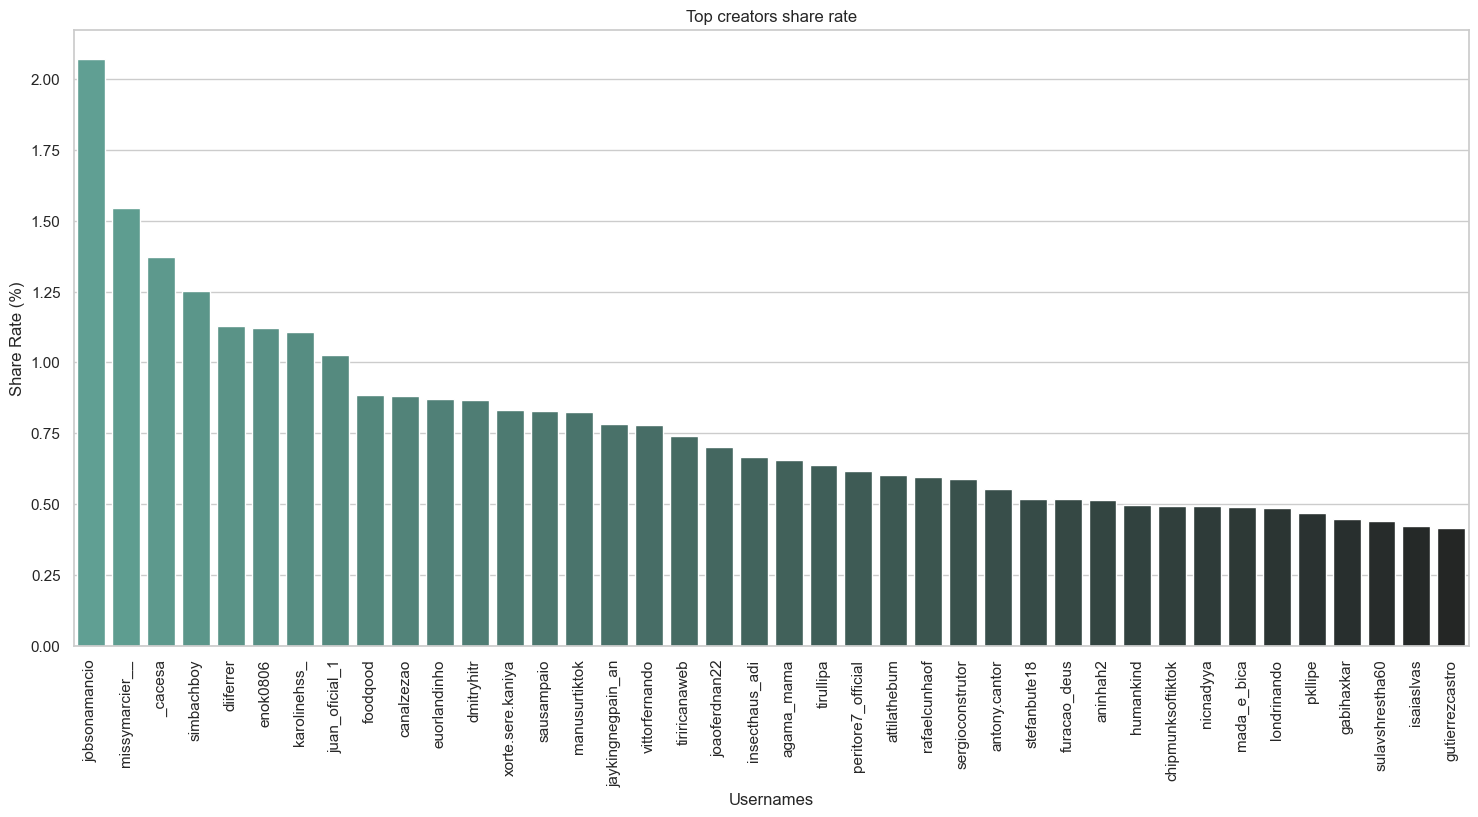

In [39]:
df_users = df_users.sort_values(by='share_rate', ascending=False)

plt.figure(figsize=(18,8))
plt.ticklabel_format(style = 'plain')
graph = sns.barplot(x = df_users.index[df_users.n_plays >= 25000000][:40], y = df_users.share_rate[df_users.n_plays >= 25000000][:40], hue = df_users.index[df_users.n_plays >= 25000000][:40], legend = False, palette = 'dark:#5A9_r', errorbar = ('ci'))

plt.xticks(rotation=90)

plt.title('Top creators share rate')
plt.ylabel('Share Rate (%)')
plt.xlabel('Usernames')

plt.savefig('./graphs/sharerate.png', dpi=200, bbox_inches='tight')

print('Mean of share rate:', np.round(df_users['share_rate'].mean(), decimals=2), '%')



Mediana de Engajamento: 7.46 %


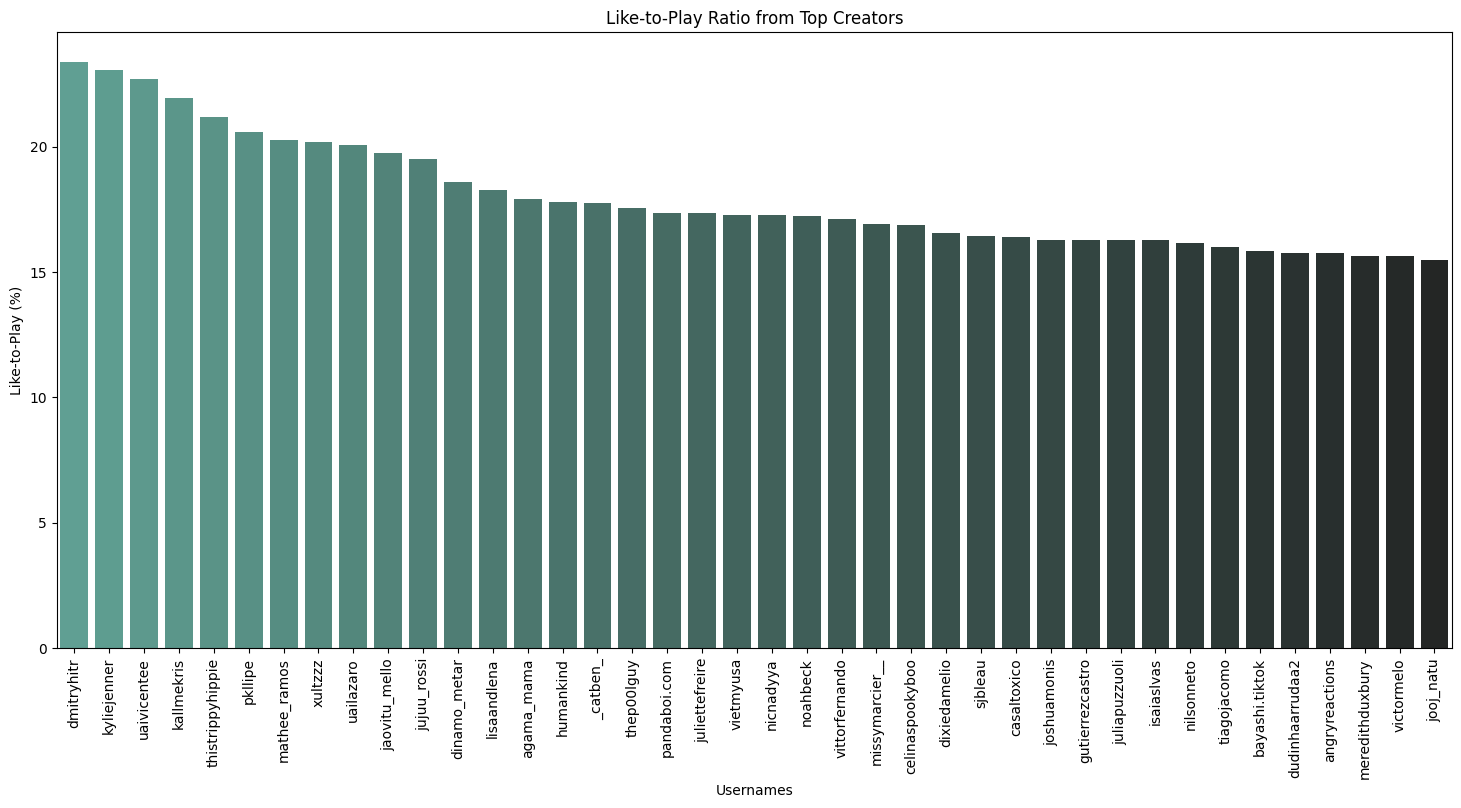

In [20]:
df_users = df_users.sort_values(by='engagement', ascending=False)

plt.figure(figsize=(18,8))
plt.ticklabel_format(style = 'plain')
graph = sns.barplot(x = df_users.index[df_users.n_plays >= 25000000][:40], y = df_users.engagement[df_users.n_plays >= 25000000][:40], hue = df_users.index[df_users.n_plays >= 25000000][:40], legend = False, palette = 'dark:#5A9_r', errorbar = ('ci'))

plt.xticks(rotation=90)

plt.title('Like-to-Play Ratio from Top Creators')
plt.ylabel('Like-to-Play (%)')
plt.xlabel('Usernames')

plt.savefig('./graphs/liketoplay.png', dpi=200, bbox_inches='tight')

print('Like-to-Play ratio mean:', np.round(df_users['engagement'].mean(), decimals=2), '%')


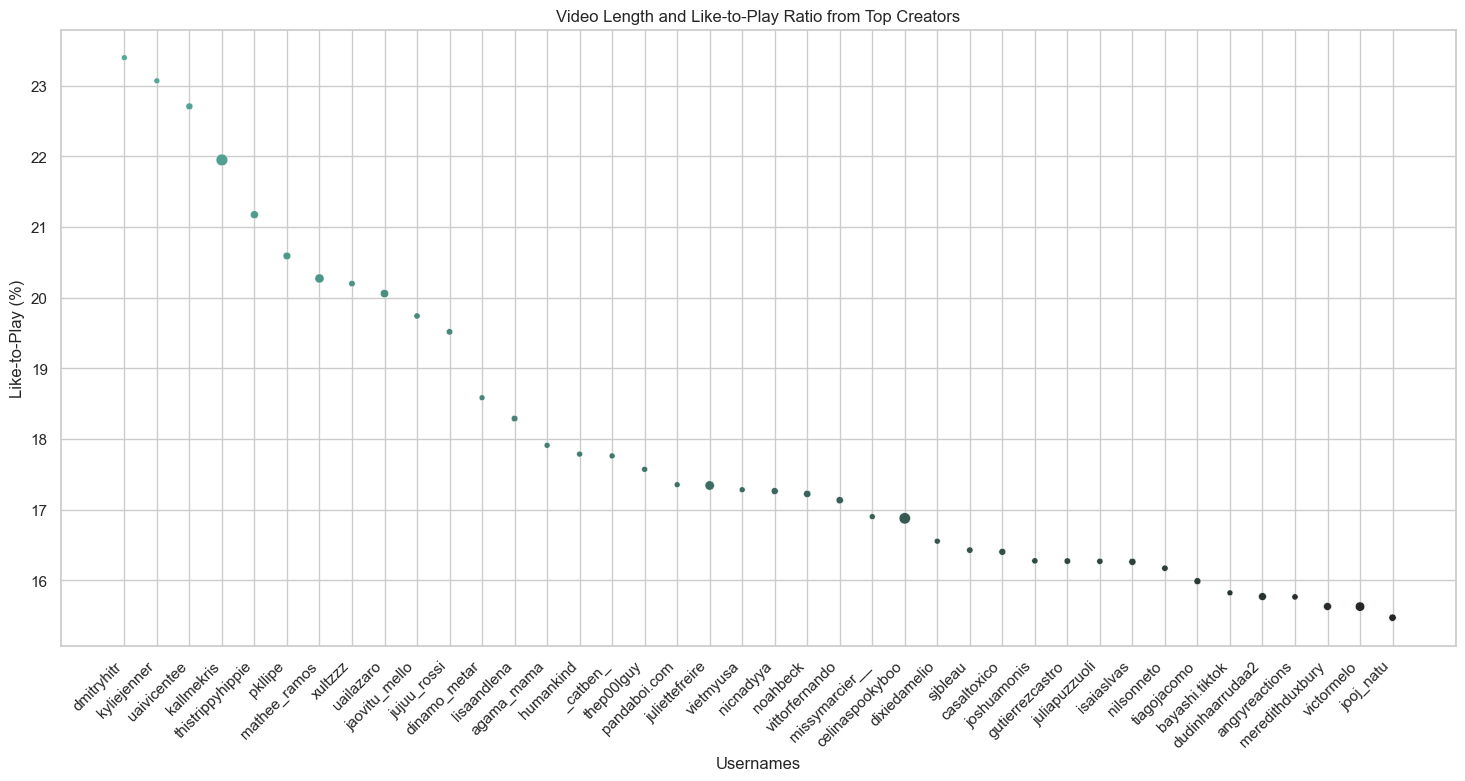

In [26]:
df_users = df_users.sort_values(by='engagement', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(18,8))
plt.ticklabel_format(style = 'plain')
graph = sns.scatterplot(x = df_users.index[df_users.n_plays >= 25000000][:40], y = df_users.engagement[df_users.n_plays >= 25000000][:40], size = df_users.video_length[df_users.n_plays >= 25000000][:40], hue = df_users.index[df_users.n_plays >= 25000000][:40],  legend = False, palette = 'dark:#5A9_r')
plt.title('Video Length and Like-to-Play Ratio from Top Creators')
plt.ylabel('Like-to-Play (%)')
plt.xlabel('Usernames')


plt.xticks(rotation=45, ha='right')
plt.savefig('./graphs/videolength.png', dpi=200, bbox_inches='tight')

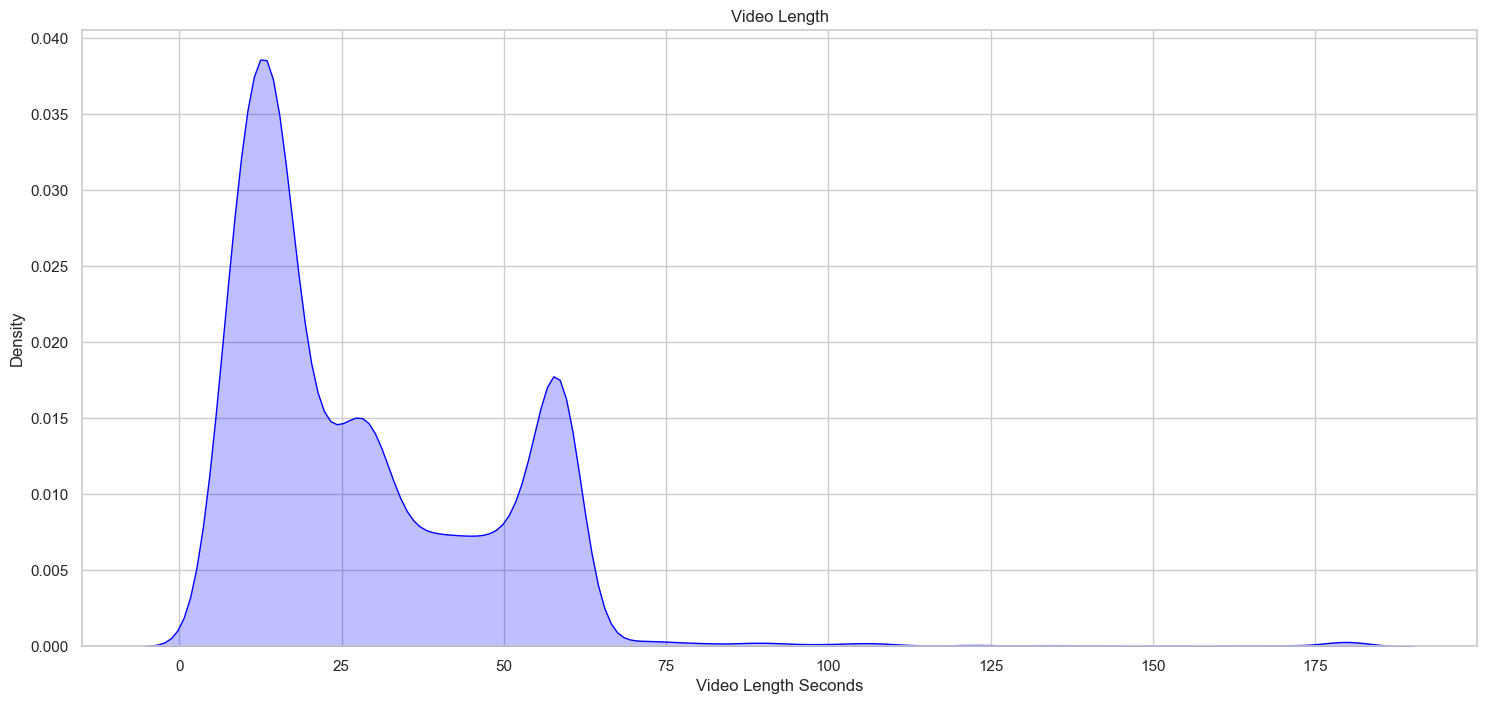

In [38]:
plt.figure(figsize=(18, 8))
sns.kdeplot(df['video_length'], fill=True, color='blue')
plt.xlabel('Video Length Seconds')
plt.title('Video Length')

plt.savefig('./graphs/videolengthdensity.png', dpi=200, bbox_inches='tight')